<a href="https://colab.research.google.com/github/Ujju09/MS/blob/master/Integrations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Integration**


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [ ]:
def simpson(a,b,n,func):
  ''' Simpsons  1/3 integration'''
  # Initializing
  h=(b-a)/n
  x = np.linspace(a,b,n+1)
  oddSum =0  
  evenSum =0
  for i in range(1,n,2):
    oddSum = oddSum + func(x[i])
  for j in range(2,n-1,2):
    evenSum = evenSum + func(x[j])

  integral = h*(func(x[0])+ 4*oddSum + 2*evenSum + func(x[-1]))/3.0

  return integral

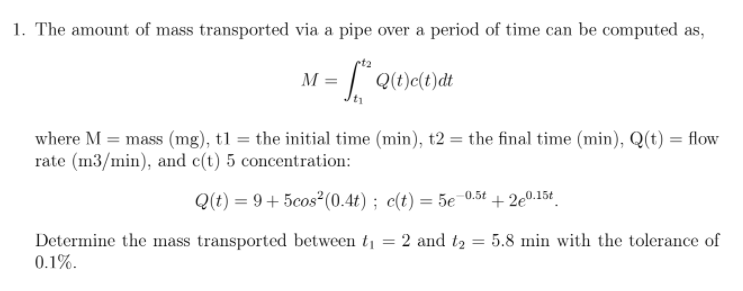

In [ ]:
def func(t):
  return (9+5*np.cos(0.4*t)**2)*(5*np.exp(-0.5*t)+2*np.exp(0.15*t))


ans  = simpson(2,5.8,4,func)
print(f'The mass transported between 2 to 5.8 minute is {ans}.')

The mass transported between 2 to 5.8 minute is 167.50099223691296.


In [ ]:
# Verification using scipy simpson function
a=2
b=5.8
n=4
xCord = np.linspace(a,b,n)

yCord = func(xCord)

integrate.simps(yCord,xCord)

168.8203299615588

##Q3

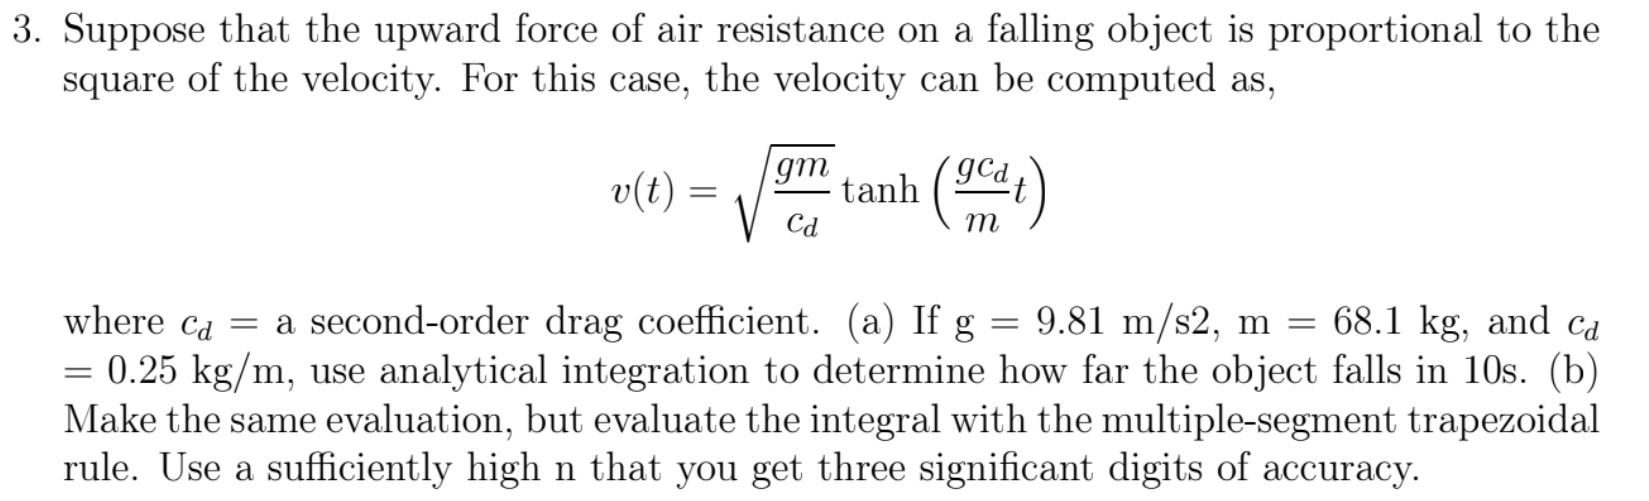

In [ ]:
def func3(t):
  return (9.81*68.1/0.25)**(0.5)*np.tanh(9.81*0.25*t/68.1)

In [ ]:
ans3a = simpson(0,10,4,func3)

print(f'The object will fall {ans3a} m in 10 seconds')

The object will fall 91.1382657244955 m in 10 seconds


###Q3 b.

In [ ]:
def trap(a,b,n,func):
  ''' Integration by trapezoidal method'''
  h=(b-a)/n
  x = np.linspace(a,b,n+1)
  Sum =0  
  for i in range(1,n-1):
    Sum = Sum + func(x[i])
  
  integral = h*(func(x[0]) + 2*Sum + func(x[-1]))/2.0

  return integral

In [ ]:
n=5000
ans3b = trap(0,10,n,func3)

print(f'The object falls  {ans3b} m in 10 seconds(estimated by trapezoidal algorithm)')

The object falls  91.1021074598323 m in 10 seconds(estimated by trapezoidal algorithm)


In [ ]:
print(f'Difference between both methods = {abs(ans3a-ans3b)} for n={n}')

Difference between both methods = 0.03615826466320016 for n=5000


# Q2

![imageq2.png]( 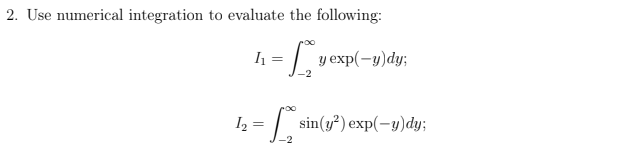)

$I_1 = \int_{-2}^{\infty} y \exp{(-y)} \mathrm{d}y$

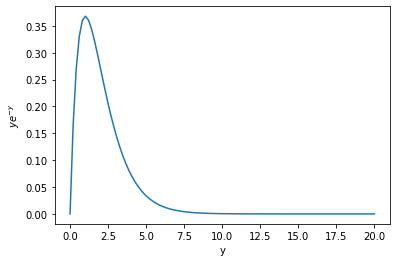

Value of y*exp(-y) at y=10 is 0.00045399929762484856


In [ ]:


def func_I1(y):
    return y*np.exp(-y)
y = np.linspace(0, 20, 100)
plt.plot(y, func_I1(y))
plt.ylabel(r'$y e^{-y}$')
plt.xlabel(r'y')
plt.show()

print('Value of y*exp(-y) at y=10 is', func_I1(10.))

Therefore, function $f_1 = y e^{-y}$ effectively dies down to $0$ by $y=10$

$\therefore I_1 = \int_{-2}^{10} y \exp{(-y)} \mathrm{d}y + \int_{10}^{\infty} y \exp{(-y)} \mathrm{d}y$

The first integral can be estimated by Simpson's $\frac{1}{3}$ rule.

The second integral can be expressed using $\int_{a}^{b} f(x) \mathrm{d}x = \int_{1/a}^{1/b} \frac{1}{t^2} f\left( \frac{1}{t} \right) \mathrm{d}t$, as:

$\int_{10}^{\infty} y \exp{(-y)} \mathrm{d}y = \int_{0}^{1/10} \frac{1}{t^2} \left( \frac{1}{t} e^{-1/t} \right) \mathrm{d}t$

Then extended midpoint rule with h=1/40 can be employed to estimate:

$\int_{0}^{1/10} \frac{1}{t^2} \left( \frac{1}{t} e^{-1/t} \right) \mathrm{d}t \cong \frac{1}{40} g(t = 1/80) +  g(t = 3/80) + g(t = 5/80) + g(t = 7/80)$

where $g(t) = \frac{1}{t^2} \left( \frac{1}{t} e^{-1/t} \right)$

In [ ]:
def g1(t):
    return (1./t**2.) * (1./t * np.exp(-1./t))

I1_1 = simpson(-2., 10., 1000, func_I1)
I1_2 = g1(1./80) + g1(3./80) + g1(5./80) + g1(7./80)

I1 = I1_1 + I1_2

print('I1 =', I1)

I1 = -7.372853599577407


$I_2 = \int_{-2}^{\infty} \sin(y^2) \exp{(-y)} \mathrm{d}y$

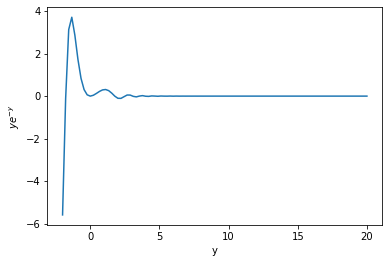

Value of sin(y^2)*exp(-y) at y=10 is 0.00030863435251223215


In [ ]:
y = np.linspace(-2, 20, 100)

def func_I2(y):
    return np.sin(y**2.)*np.exp(-y)

plt.plot(y, func_I2(y))
plt.ylabel(r'$y e^{-y}$')
plt.xlabel(r'y')
plt.show()

print('Value of sin(y^2)*exp(-y) at y=10 is', func_I2(8.))

Therefore, function $f_2 = \sin(y^2) e^{-y}$ effectively dies down to $0$ by $y=8$

$\therefore I_2 = \int_{-2}^{8} \sin(y^2) \exp{(-y)} \mathrm{d}y + \int_{8}^{\infty} \sin(y^2) \exp{(-y)} \mathrm{d}y$

The first integral can be estimated by Simpson's $\frac{1}{3}$ rule with n = 1000.

The second integral can be expressed using $\int_{a}^{b} f(x) \mathrm{d}x = \int_{1/a}^{1/b} \frac{1}{t^2} f\left( \frac{1}{t} \right) \mathrm{d}t$, as:

$\int_{8}^{\infty} \sin(y^2) \exp{(-y)} \mathrm{d}y = \int_{0}^{1/8} \frac{1}{t^2} \left( \sin \left( \frac{1}{t^2} \right) e^{-1/t} \right) \mathrm{d}t$

Then extended midpoint rule with h=1/32 can be employed to estimate:

$\int_{0}^{1/8} \frac{1}{t^2} \left( \frac{1}{t} e^{-1/t} \right) \mathrm{d}t \cong \frac{1}{32} g(t = 1/64) +  g(t = 3/64) + g(t = 5/64) + g(t = 7/64)$,

where $g(t) = \frac{1}{t^2} \left( \sin \left( \frac{1}{t^2} \right) e^{-1/t} \right)$

In [ ]:
def g_2(t):
    return (1./t**2.) * (np.sin(1./t**2.) * np.exp(-1./t))

I2_1 = simpson(-2., 8., 1000, func_I2)
I2_2 = g_2(1./64) + g_2(3./64) + g_2(5./64) + g_2(7./64)

I2 = I2_1 + I2_2

print('I2 =', I2)

I2 = 2.5473795383786695
